<h2>IMDB DataSet을 이용한  LSTM 모델(순환 신경망)</h2>

<h3>0. 기본 소개</h3>

<h3>DataSet: IMDB</h3>


IMDB는 Internet Movie DataBase을 뜻하며 영화에 대한 리뷰 데이터, 총 5만개의 리뷰로 이루어져 있고 훈련 데이터와 검증데이터를 각각 25000개씩 각각 50대50의 긍정리뷰와 부정리뷰를 가지고 있다.

<h3>learning Model: LSTM</h3>

LSTM은 RNNs(Recurrent Neural Networks)의 한종류로, RNNs는 완벽한 인공 신경망 구조라는 의견도 존재한다.

FFNets(일반적인 신경망 구조)처럼 입력 데이터가 은닉층의 모든 노드를 딱 한번씩만 지나게 되는 구조는, <b>전에 수행했던 데이터에 대해서는 기억하지 않는 것이 특징</b>이다.

하지만,  RNNs의 경우에는, feedback구조를 가지고 있고, 사용자의 메모리의 정도에 따라 전에 수행했던 입력했던 데이터의 은닉층 값을 저장하고 있으며, 결국 은닉층 값의 중요도 정도에 따라 (T)시간에 들어오는 입력 데이터 값에, (T-1)시간 때 수행되었던 입력데이터의 은닉층 값이 영향을 미친다.<b>(즉, 전에 수행했던 데이터를 기억해 학습에 활용한다)</b>

LSTM은 기존의 일반적인 모델보다 조금 더 발전된 RNNs라고 할 수 있으며, 그라디언트에 관한 이해가 필요하다.

그라디언트 안정화 문제 (Vanishing and Exploding Gradients)

미분을 통해 기울기를 구할 수 있기 때문에, X의 작은 변화량에 따른 Y의 변화량의 비율을 나타낼 수 있다. 이말인 즉, 모든 가중치와 오차의 관계를 구할 수 있다는 말이다.

LSTM의 유닛은 여러 개의 게이트가 붙어있는 셀(cell)로 이루어진다. 여기서 말하는 셀(cell)은 컴퓨터 메모리상의 셀과 비슷한 의미를 가진다.

현재의 입력신호와 과거셀의 피드백(feedback)을 입력값에 넣은 뒤, 게이트를 통해 디지털 방식이 아닌 아날로그 방식으로 입력값에 대한 결정을 하게 된다.


<h2> 1. 실습 </h2>

In [0]:


from __future__ import absolute_import, division, print_function, unicode_literals

from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding
from keras.layers import Dense, Activation,  Flatten
from keras.layers.recurrent import LSTM

import numpy as np



# <h3> -> 1.사용할 패키지 불러오기 </h3>

In [0]:


imdb = keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

<h3> ->ㄴ. 데이터셋 생성하기</h3>


훈련셋과 시험셋 불러오기

In [17]:
print(x_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 

In [0]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

<h3>->훈련셋과 검증셋 분리</h3>

In [0]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

<h3>->데이터셋 전처리 : 문장 길이 맞추기</h3>

In [0]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

<h3>-> 모델 구성하기</h3>


<h4>Embedding</h4>
범주형 자료를 연속적 벡터에 형태로 변환 시키는 함수로, 단어를 n차원의 벡터로 매핑시킨다.

<h4>Sigmoid</h4>
활성화 함수로써, 0과1 사이의 값을 가지는 비선형 함수이다. 

*Activation Function: 어떠한 신호를 입력받아 이를 적절한 처리를 통해 출력해주는 함수

*선형 : 그래프가 직선 형태를 띄고, 함수값이 예측가능하다.

*비선형 : 함수의 수식이 알려지지 않으면, 함수값을 예측하기 힘들다.

In [22]:
# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))


W0805 01:46:35.596708 140270821459840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 01:46:35.710658 140270821459840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 01:46:35.725051 140270821459840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 01:46:37.501211 140270821459840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 454s 23ms/step - loss: 0.4519 - acc: 0.7856 - val_loss: 0.3613 - val_acc: 0.8448
Epoch 2/25
20000/20000 [==============================] - 488s 24ms/step - loss: 0.2346 - acc: 0.9106 - val_loss: 0.3298 - val_acc: 0.8528
Epoch 3/25
20000/20000 [==============================] - 492s 25ms/step - loss: 0.1438 - acc: 0.9496 - val_loss: 0.3648 - val_acc: 0.8594
Epoch 4/25
20000/20000 [==============================] - 493s 25ms/step - loss: 0.1030 - acc: 0.9642 - val_loss: 0.3987 - val_acc: 0.8470
Epoch 5/25
20000/20000 [==============================] - 490s 24ms/step - loss: 0.0810 - acc: 0.9724 - val_loss: 0.4671 - val_acc: 0.8596
Epoch 6/25
20000/20000 [==============================] - 485s 24ms/step - loss: 0.0497 - acc: 0.9827 - val_loss: 0.5289 - val_acc: 0.8582
Epoch 7/25
20000/20000 [==============================] - 488s 24ms/step - loss: 0.0409 - acc: 0.9874 - val_loss: 0.5

<h3>->모델 학습과정 설정하기</h3>
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


<h3> -> 모델 학습시키기 </h3>
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

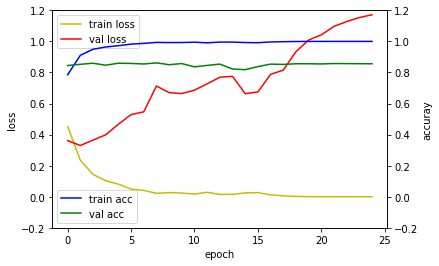

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

<h3> ->훈련과 검증 손실 분석</h3>
훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가합니다. 경사 하강법 최적화를 사용했을때 반복마다 최소화되는 것이 손실이므로 기대했던 예상입니다.3번째 순간부터 train loss보다 val loss가 역전하면서 급격하게 상승합니다. 즉, 이 말은 처음 보는 데이터에게는 잘 작동하지 않는 다는 것을 의미합니다. 이는 <b>Overfitting</b>되었다고 하는데, 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습했다고 볼 수 있습니다.

In [25]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 88s 4ms/step
## evaluation loss and_metrics ##
[1.3320180743408203, 0.8447599999809265]


<h3>최종 정확도: 84.4%</h3>